<a href="https://colab.research.google.com/github/YuviM15/Python_Programs/blob/main/Handwriting_Detector_(0_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

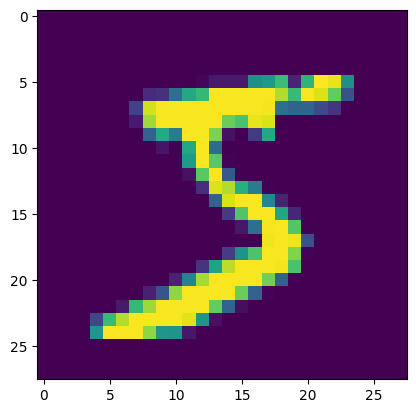

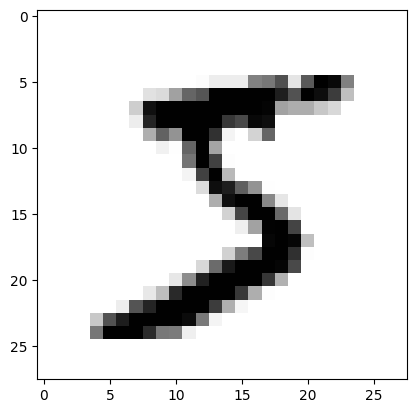

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [ ]:
# print(x_train[0])

In [ ]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)
# plt.imshow(x_train[0], cmap=plt.cm.binary)

In [ ]:
# print(x_train[0])

In [ ]:
# print(y_train[0])

In [ ]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training diamension",x_trainr.shape)
print("Test diamension",x_testr.shape)

Training diamension (60000, 28, 28, 1)
Test diamension (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D

In [ ]:
model= Sequential()

model.add(Conv2D(64,(3,3), input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96,(3,3)))
model.add(Activation("relu"))

model.add(Conv2D(96,(3,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

# model.add(Dense(64))
# model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_19 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 activation_20 (Activation)  (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 96)        55392     
                                                      

In [ ]:
from keras.optimizers import Adam

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,y_train,epochs=6,validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 12s 6ms/step - loss: 0.1656 - accuracy: 0.9467 - val_loss: 0.0519 - val_accuracy: 0.9843
Epoch 2/6
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0506 - accuracy: 0.9845 - val_loss: 0.0464 - val_accuracy: 0.9870
Epoch 3/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0453 - val_accuracy: 0.9882
Epoch 4/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0397 - val_accuracy: 0.9883
Epoch 5/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 6/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0375 - val_accuracy: 0.9890


In [ ]:
test_loss, test_acc=model.evaluate(x_testr,y_test)
print("Test loss of 10k",test_loss)
print("Validation",test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9922
Test loss of 10k 0.03240368515253067
Validation 0.9922000169754028


In [ ]:
predictions= model.predict([x_testr])

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(predictions)

[[5.70345438e-10 1.55717274e-07 1.46653804e-06 ... 9.99992013e-01
  2.74976514e-07 5.89088040e-06]
 [5.76041748e-06 5.89377755e-08 9.99986887e-01 ... 1.42896739e-09
  2.61047035e-07 6.40085451e-09]
 [4.52505061e-10 9.99988437e-01 1.03325995e-07 ... 2.43704653e-06
  8.92947355e-06 7.12325487e-09]
 ...
 [1.90104157e-16 1.51079479e-11 1.34412135e-14 ... 1.23358401e-09
  2.56980881e-09 1.12186903e-07]
 [1.66510111e-10 9.00041239e-12 8.36762419e-15 ... 6.10511424e-12
  4.32438213e-07 1.95533456e-09]
 [4.18951061e-08 1.48363211e-10 2.85840129e-10 ... 1.32627329e-11
  2.65352842e-08 1.83375051e-10]]


7


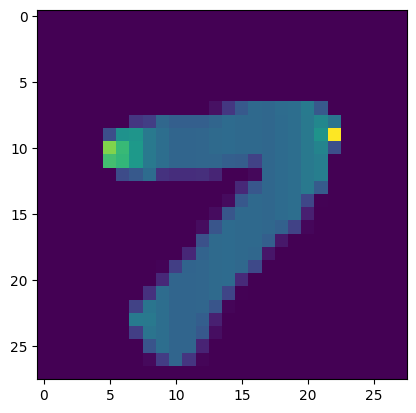

In [ ]:
plt.imshow(x_test[79])
print(np.argmax(predictions[79]))

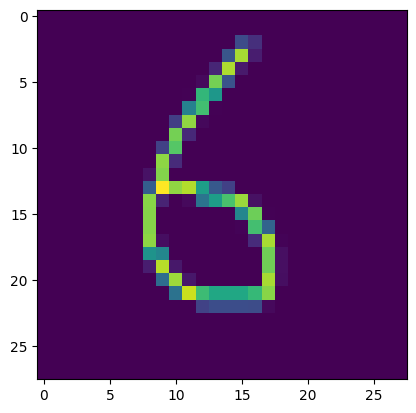

In [ ]:
import cv2
img=cv2.imread('s1.png')

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
plt.imshow(resized)
newimg=tf.keras.utils.normalize(resized,axis=1)
newimg=np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)


In [ ]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 23ms/step


In [ ]:
print(np.argmax(predictions))

6
